# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# Load the Dataset

In [2]:
import kagglehub

path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/student_depression_dataset.csv")
column_mapping = {
    "id": "id",
    "Gender": "gender",
    "Age": "age",
    "City": "city",
    "Profession": "profession",
    "Academic Pressure": "academic_pressure",
    "Work Pressure": "work_pressure",
    "CGPA": "cgpa",
    "Study Satisfaction": "study_satisfaction",
    "Job Satisfaction": "job_satisfaction",
    "Sleep Duration": "sleep_duration",
    "Dietary Habits": "dietary_habits",
    "Degree": "degree",
    "Have you ever had suicidal thoughts ?": "suicidal_thoughts",
    "Work/Study Hours": "work_study_hours",
    "Financial Stress": "financial_stress",
    "Family History of Mental Illness": "family_mental_illness",
    "Depression": "depression"
}
df = df.rename(columns=column_mapping)
print("Number of example: {}".format(len(df)))

/Users/lemmoor/miniconda3/envs/depression/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/lemmoor/.cache/kagglehub/datasets/adilshamim8/student-depression-dataset/versions/1
Number of example: 27901


# 1. Data Cleaning & Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     27901 non-null  int64  
 1   gender                 27901 non-null  object 
 2   age                    27901 non-null  float64
 3   city                   27901 non-null  object 
 4   profession             27901 non-null  object 
 5   academic_pressure      27901 non-null  float64
 6   work_pressure          27901 non-null  float64
 7   cgpa                   27901 non-null  float64
 8   study_satisfaction     27901 non-null  float64
 9   job_satisfaction       27901 non-null  float64
 10  sleep_duration         27901 non-null  object 
 11  dietary_habits         27901 non-null  object 
 12  degree                 27901 non-null  object 
 13  suicidal_thoughts      27901 non-null  object 
 14  work_study_hours       27901 non-null  float64
 15  fi

In [4]:
df.describe(include='all')

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


In [5]:
df

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [6]:
df["sleep_duration"].value_counts()

sleep_duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

## Feature Distributions

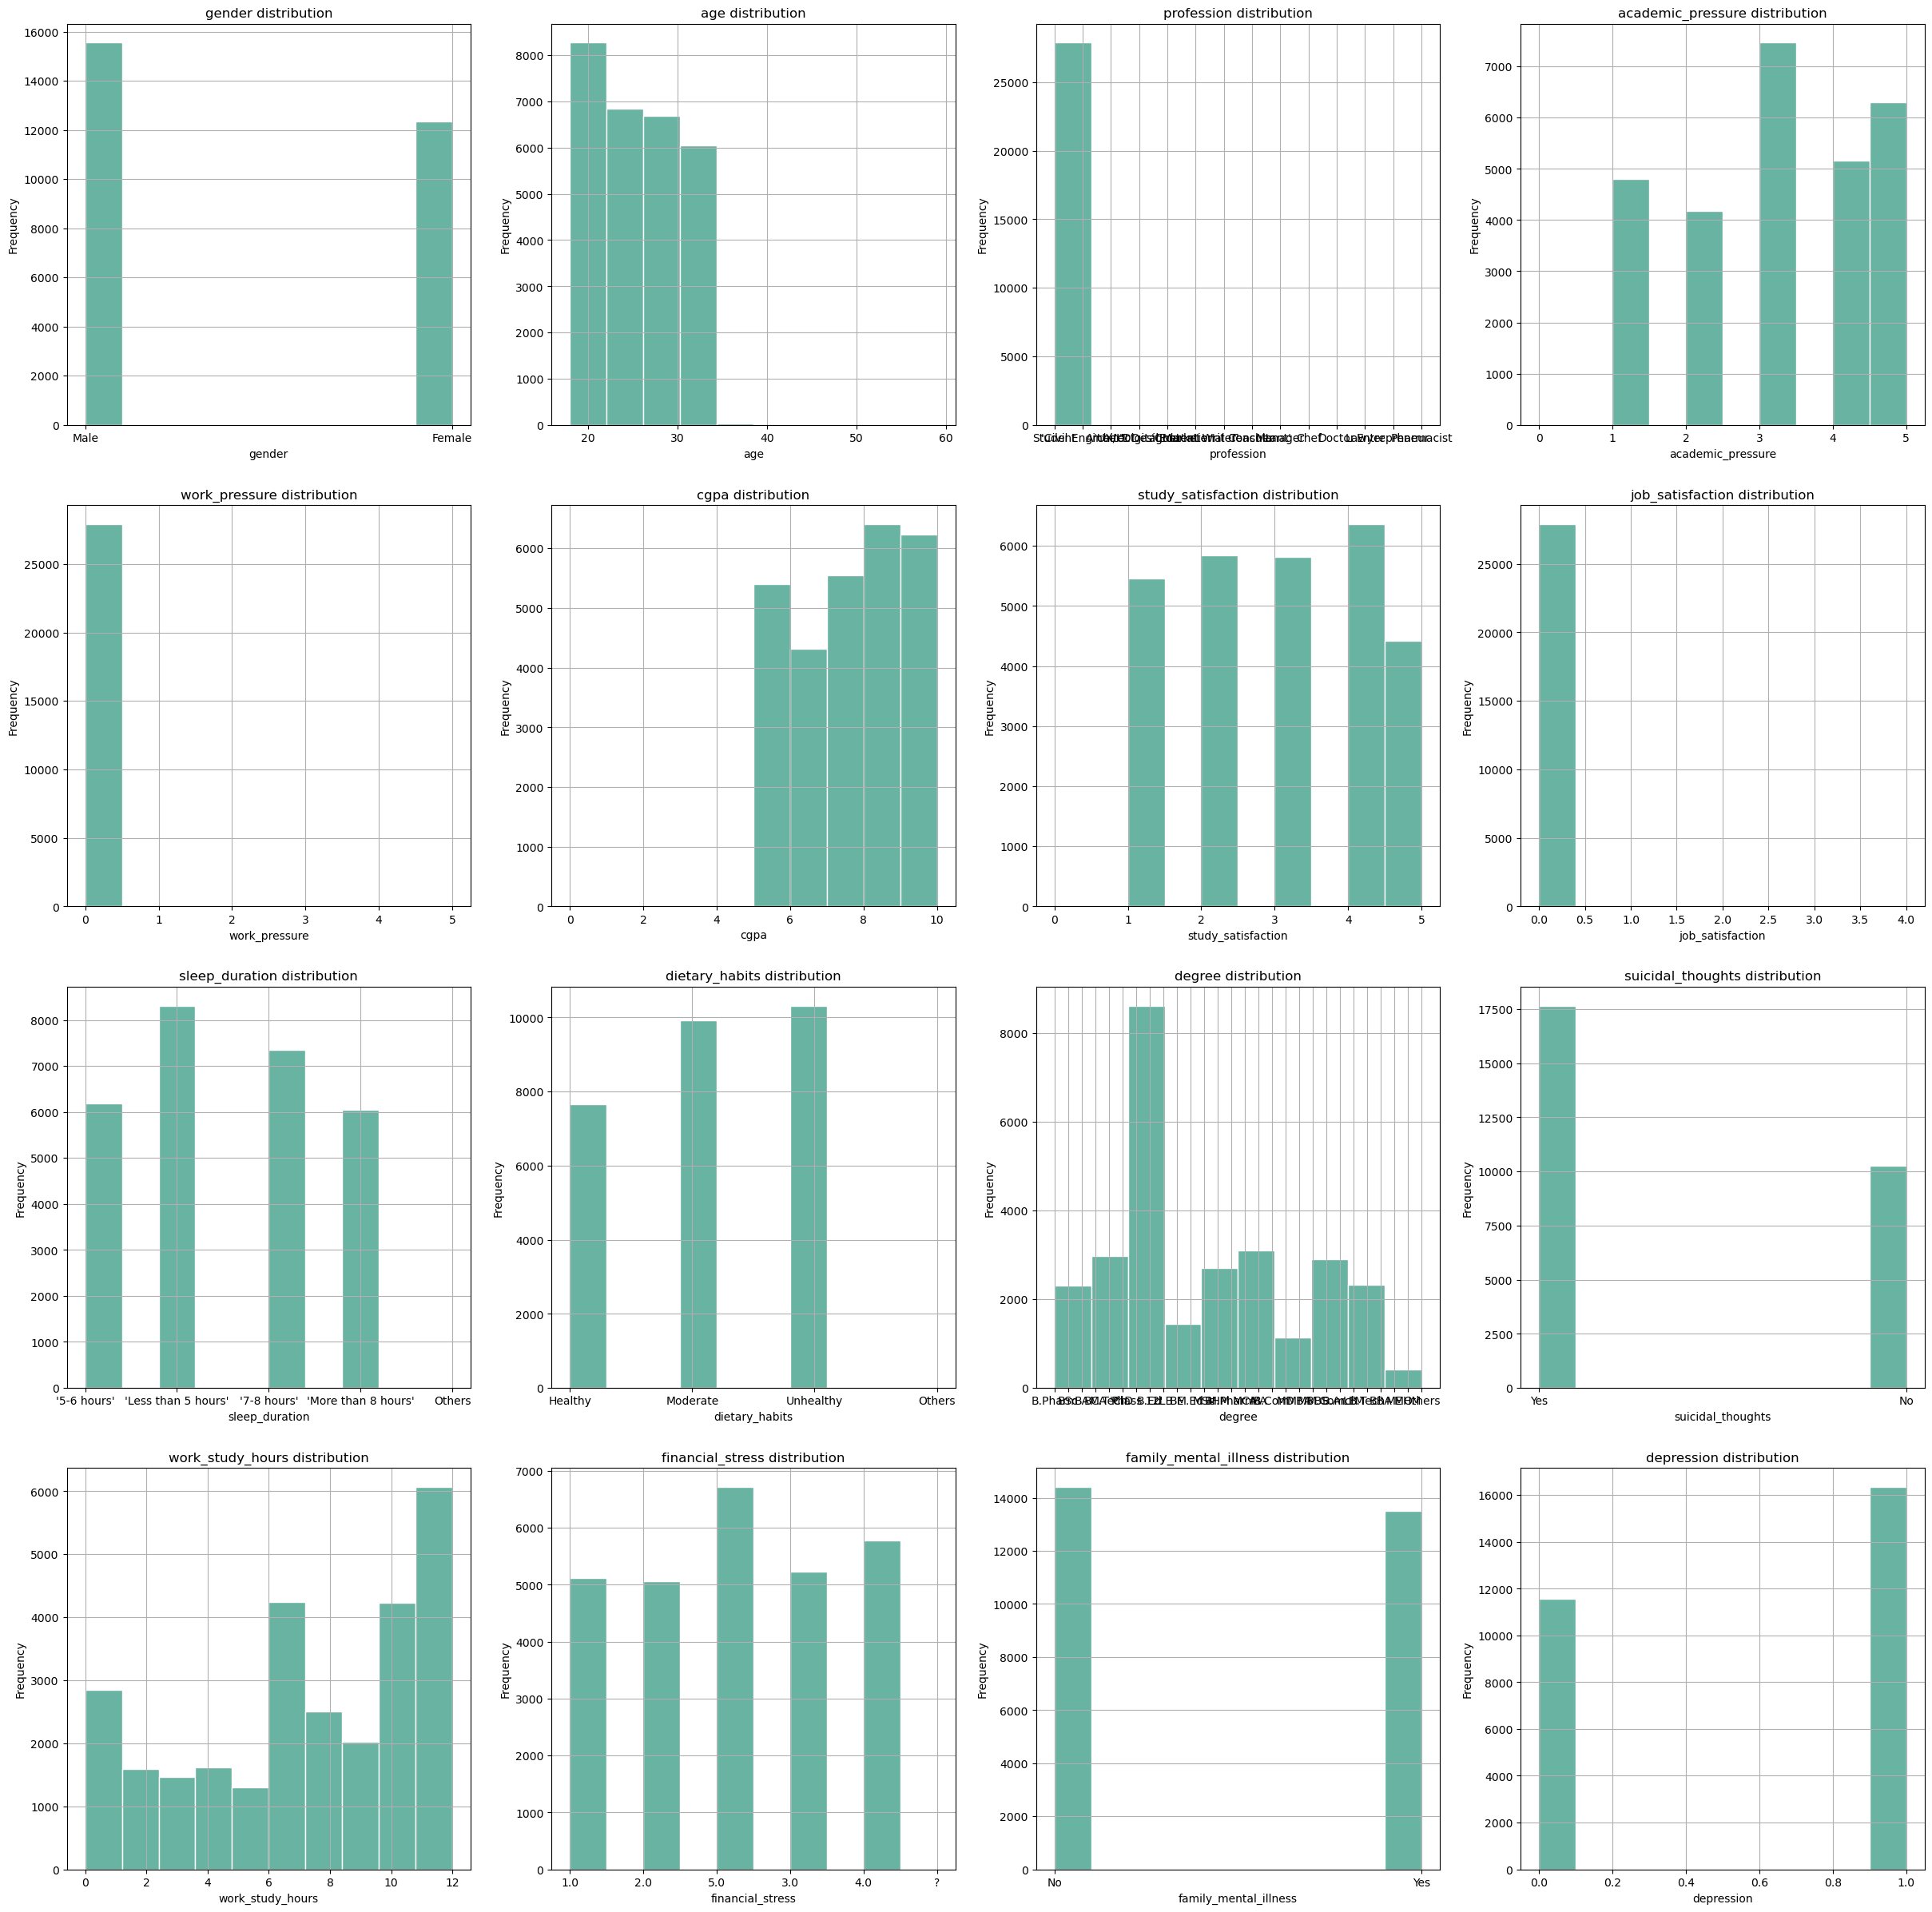

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 30))

axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate([col for col in df.columns if col not in ['id', 'city']]):
    df[column].hist(ax=axes[i], 
                    edgecolor='white', 
                    color='#69b3a2' 
                   )
    
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 


plt.show()

In [8]:
df["city"].value_counts()

city
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
Kibara   

In [9]:
df["sleep_duration"].value_counts()

sleep_duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

In [10]:
def extract_hours(s):
    if 'Less than 5 hours' in s:
        return 5.0
    elif '5-6 hours' in s:
        return 5.5
    elif '7-8 hours' in s:
        return 7.5
    elif 'More than 8 hours' in s:
        return 8.0
    else:
        return np.nan

print(df["sleep_duration"].head())

df['sleep_duration'] = df['sleep_duration'].apply(extract_hours)

print(df[['sleep_duration']].head())

0            '5-6 hours'
1            '5-6 hours'
2    'Less than 5 hours'
3            '7-8 hours'
4            '5-6 hours'
Name: sleep_duration, dtype: object
   sleep_duration
0             5.5
1             5.5
2             5.0
3             7.5
4             5.5


## Check for missing values

In [11]:
missing_values = df.isnull().sum()
print(missing_values)
df = df.dropna()
df = df[df["dietary_habits"] != "Others"]
df = df[df["financial_stress"] != "?"]

id                        0
gender                    0
age                       0
city                      0
profession                0
academic_pressure         0
work_pressure             0
cgpa                      0
study_satisfaction        0
job_satisfaction          0
sleep_duration           18
dietary_habits            0
degree                    0
suicidal_thoughts         0
work_study_hours          0
financial_stress          0
family_mental_illness     0
depression                0
dtype: int64


## Drop not useful columns

In [12]:
df = df.drop(columns=['id', 'profession', 'job_satisfaction', 'work_pressure'])

## Deal with categorical features

In [13]:
df['suicidal_thoughts'] = df['suicidal_thoughts'].map({'Yes': 1, 'No': 0})
df['family_mental_illness'] = df['family_mental_illness'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [14]:
display(df["dietary_habits"].unique())
df['dietary_habits'] = df['dietary_habits'].map({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2})

array(['Healthy', 'Moderate', 'Unhealthy'], dtype=object)

In [15]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['city', 'degree'])
df_encoded = encoder.fit_transform(df)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27868 entries, 0 to 27900
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 27868 non-null  int64  
 1   age                    27868 non-null  float64
 2   city_0                 27868 non-null  int64  
 3   city_1                 27868 non-null  int64  
 4   city_2                 27868 non-null  int64  
 5   city_3                 27868 non-null  int64  
 6   city_4                 27868 non-null  int64  
 7   city_5                 27868 non-null  int64  
 8   academic_pressure      27868 non-null  float64
 9   cgpa                   27868 non-null  float64
 10  study_satisfaction     27868 non-null  float64
 11  sleep_duration         27868 non-null  float64
 12  dietary_habits         27868 non-null  int64  
 13  degree_0               27868 non-null  int64  
 14  degree_1               27868 non-null  int64  
 15  degree_

## Convert all columns to float

In [16]:
df_encoded = df_encoded.astype(float)

print("All columns converted to float:")
print(df_encoded.dtypes)

All columns converted to float:
gender                   float64
age                      float64
city_0                   float64
city_1                   float64
city_2                   float64
city_3                   float64
city_4                   float64
city_5                   float64
academic_pressure        float64
cgpa                     float64
study_satisfaction       float64
sleep_duration           float64
dietary_habits           float64
degree_0                 float64
degree_1                 float64
degree_2                 float64
degree_3                 float64
degree_4                 float64
suicidal_thoughts        float64
work_study_hours         float64
financial_stress         float64
family_mental_illness    float64
depression               float64
dtype: object


## Correlation matrix

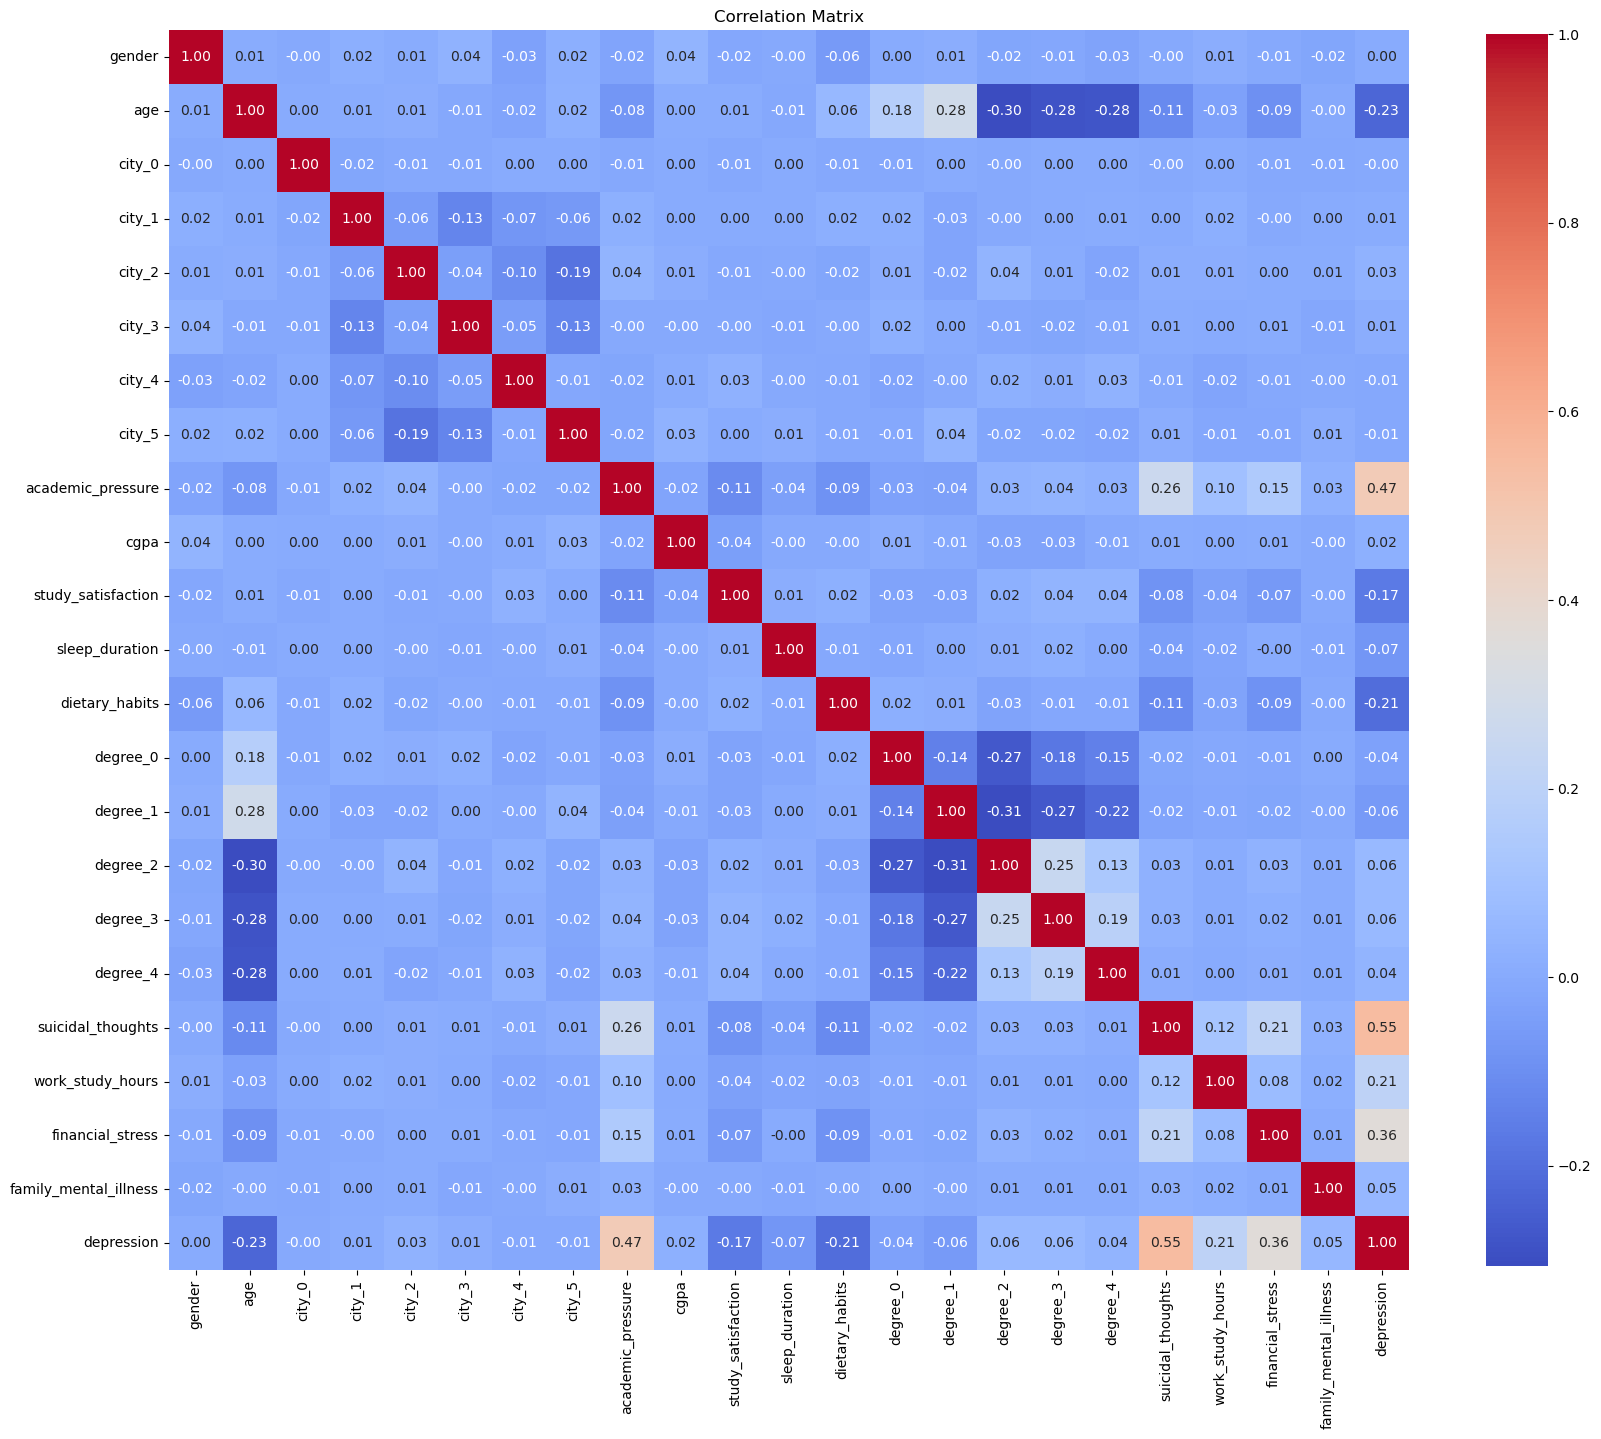

In [17]:
correlation_matrix = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [18]:
# As we may see from the correlation matrix degree and city are not correlated with depression, so we can drop them.

df_encoded = df_encoded.drop(columns=['degree_0', 'degree_1', 'degree_2', 'degree_3', 'degree_4', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4', 'city_5'])


In [19]:
df_encoded.head()

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
0,1.0,33.0,5.0,8.97,2.0,5.5,2.0,1.0,3.0,1.0,0.0,1.0
1,0.0,24.0,2.0,5.90,5.0,5.5,1.0,0.0,3.0,2.0,1.0,0.0
2,1.0,31.0,3.0,7.03,5.0,5.0,2.0,0.0,9.0,1.0,1.0,0.0
3,0.0,28.0,3.0,5.59,2.0,7.5,1.0,1.0,4.0,5.0,1.0,1.0
4,0.0,25.0,4.0,8.13,3.0,5.5,1.0,1.0,1.0,1.0,0.0,0.0


## Creating labels

In [20]:
labels = df_encoded['depression'].copy()
# Convert labels to tensor
y = torch.tensor(labels.values, dtype=torch.float32)

X = df_encoded.drop(columns=['depression'])
X = torch.tensor(X.values, dtype=torch.float32)


## Splitting to training and testing dataset.

In [21]:
from sklearn.model_selection import train_test_split

# Using sklearn's train_test_split with torch tensors
X_train_indices, X_test_indices = train_test_split(
    range(len(X)), test_size=0.2, random_state=50, stratify=y.numpy()
)


# Get the corresponding tensors using the indices
X_train = X[X_train_indices]
X_test = X[X_test_indices]
y_train = y[X_train_indices]
y_test = y[X_test_indices]

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: torch.Size([22294, 11]), torch.Size([22294])
Testing set: torch.Size([5574, 11]), torch.Size([5574])


## Normalizing

In [22]:
mean = X_train.mean(dim=0, keepdim=True)
std = X_train.std(dim=0, keepdim=True)

# Avoid division by zero
eps = 1e-6
X_train_norm = (X_train - mean) / (std + eps)
X_test_norm  = (X_test  - mean) / (std + eps)

In [23]:
display(df_encoded)

display(X_train_norm)

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
0,1.0,33.0,5.0,8.97,2.0,5.5,2.0,1.0,3.0,1.0,0.0,1.0
1,0.0,24.0,2.0,5.90,5.0,5.5,1.0,0.0,3.0,2.0,1.0,0.0
2,1.0,31.0,3.0,7.03,5.0,5.0,2.0,0.0,9.0,1.0,1.0,0.0
3,0.0,28.0,3.0,5.59,2.0,7.5,1.0,1.0,4.0,5.0,1.0,1.0
4,0.0,25.0,4.0,8.13,3.0,5.5,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.0,27.0,5.0,5.75,5.0,5.5,0.0,1.0,7.0,1.0,1.0,0.0
27897,1.0,27.0,2.0,9.40,3.0,5.0,2.0,0.0,0.0,3.0,1.0,0.0
27898,1.0,31.0,3.0,6.61,4.0,5.5,0.0,0.0,12.0,2.0,0.0,0.0
27899,0.0,18.0,5.0,6.88,2.0,5.0,2.0,1.0,10.0,5.0,0.0,1.0


tensor([[ 0.8917, -0.9808, -1.5522,  ...,  0.7644,  1.2900,  1.0310],
        [-1.1214, -0.5732,  0.6269,  ..., -0.8539, -0.7937,  1.0310],
        [ 0.8917, -0.9808, -1.5522,  ...,  1.0341, -0.7937, -0.9698],
        ...,
        [ 0.8917,  1.0570, -1.5522,  ...,  1.0341, -0.0991,  1.0310],
        [ 0.8917,  0.8532, -0.0995,  ...,  0.7644,  0.5955, -0.9698],
        [ 0.8917,  1.0570, -0.8258,  ...,  0.7644, -1.4883,  1.0310]])

## 2. Neural network

In [24]:
print(len(X_train_norm[1]))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(11, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

11


Epoch 10/50, Loss: 0.2543, Train Acc: 0.8430, Test Acc: 0.8410
Epoch 20/50, Loss: 0.5335, Train Acc: 0.8414, Test Acc: 0.8425
Epoch 30/50, Loss: 0.2282, Train Acc: 0.8456, Test Acc: 0.8436
Epoch 40/50, Loss: 0.3477, Train Acc: 0.8456, Test Acc: 0.8427
Epoch 50/50, Loss: 0.2926, Train Acc: 0.8453, Test Acc: 0.8423


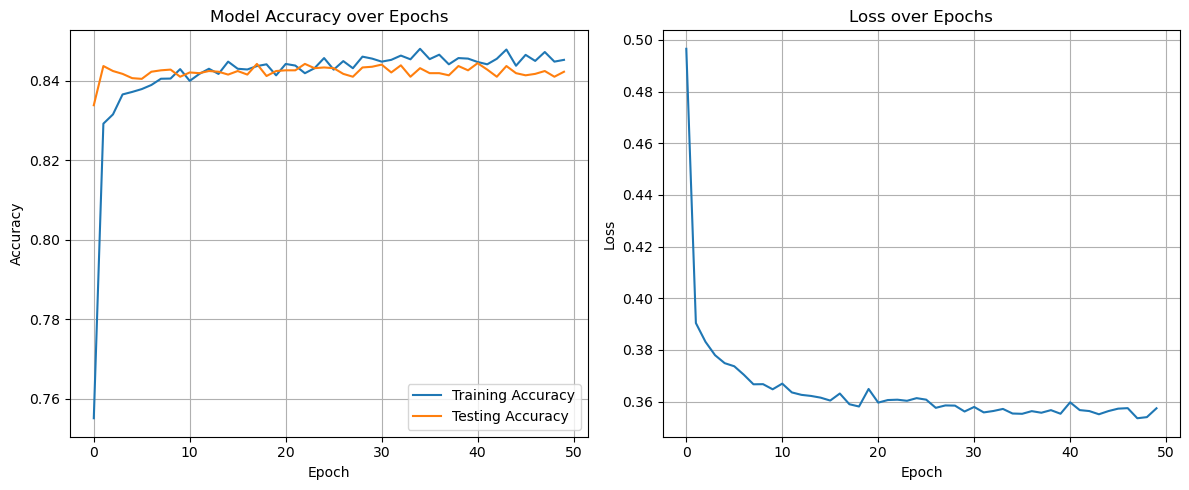

In [25]:
NNmodel = NeuralNetwork()
criterion = nn.BCELoss()  # BCEWithLogitsLoss ?
optimizer = optim.Adam(NNmodel.parameters(), lr=0.0001)

# Initialize lists to track metrics
train_accuracies = []
test_accuracies = []
losses = []

batch_size = 64
train_dataset = torch.utils.data.TensorDataset(X_train_norm, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

num_epochs = 50

for epoch in range(num_epochs):
    # Training phase
    NNmodel.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader: 
        # Forward pass with just this batch
        outputs = NNmodel(inputs)
        loss = criterion(outputs.squeeze(), labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track metrics
        total_loss += loss.item()
        preds = (outputs.squeeze() > 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    
    train_acc = correct / total
    avg_loss = total_loss / len(train_loader)

    train_accuracies.append(train_acc)
    losses.append(avg_loss)

    # Validation phase
    NNmodel.eval()
    with torch.no_grad():
        y_val_pred = NNmodel(X_test_norm)
        val_preds = (y_val_pred.squeeze() > 0.5).float()
        val_acc = (val_preds == y_test).float().mean()
        test_accuracies.append(val_acc.item())
    

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {val_acc:.4f}")

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid(True)

plt.tight_layout()
plt.show()


## 3. XGBoost

In [26]:
from xgboost import XGBClassifier

X_train_np = X_train_norm.numpy()
y_train_np = y_train.numpy()
X_test_np = X_test_norm.numpy()
y_test_np = y_test.numpy()

XGBmodel = XGBClassifier(
  tree_method="auto",
  gpu_id=0,
  max_depth=4,
  learning_rate=0.1,
  objective="binary:logistic",
  eval_metric="logloss",
  early_stopping_rounds=3,
)

XGBmodel.fit(
  X_train_np,
  y_train_np,
  eval_set=[(X_test_np, y_test_np)]
)

print()


[0]	validation_0-logloss:0.63387
[1]	validation_0-logloss:0.59767
[2]	validation_0-logloss:0.56766
[3]	validation_0-logloss:0.54247
[4]	validation_0-logloss:0.52124
[5]	validation_0-logloss:0.50366
[6]	validation_0-logloss:0.48816
[7]	validation_0-logloss:0.47512
[8]	validation_0-logloss:0.46327
[9]	validation_0-logloss:0.45312
[10]	validation_0-logloss:0.44456
[11]	validation_0-logloss:0.43723
[12]	validation_0-logloss:0.43002
[13]	validation_0-logloss:0.42409
[14]	validation_0-logloss:0.41868
[15]	validation_0-logloss:0.41393
[16]	validation_0-logloss:0.40959
[17]	validation_0-logloss:0.40535
[18]	validation_0-logloss:0.40180
[19]	validation_0-logloss:0.39860
[20]	validation_0-logloss:0.39543
[21]	validation_0-logloss:0.39302
[22]	validation_0-logloss:0.39082
[23]	validation_0-logloss:0.38849
[24]	validation_0-logloss:0.38644
[25]	validation_0-logloss:0.38467
[26]	validation_0-logloss:0.38258
[27]	validation_0-logloss:0.38097
[28]	validation_0-logloss:0.37960
[29]	validation_0-loglos

/Users/lemmoor/miniconda3/envs/depression/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [23:36:33] WARNING: /Users/runner/work/xgboost/xgboost/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  self.starting_round = model.num_boosted_rounds()
/Users/lemmoor/miniconda3/envs/depression/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [23:36:33] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()


In [27]:
from sklearn.metrics import accuracy_score

# Convert probabilities to binary predictions
y_XGB_pred = (XGBmodel.predict(X_test_np) > 0.5).astype(int)

accuracy = accuracy_score(y_test_np, y_XGB_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.32%


# Summary

Neural Network Metrics:
Accuracy: 0.8423
Precision: 0.8565
Recall: 0.8778
F1 Score: 0.8670

XGBoost Metrics:
Accuracy: 0.8432
Precision: 0.8536
Recall: 0.8839
F1 Score: 0.8685


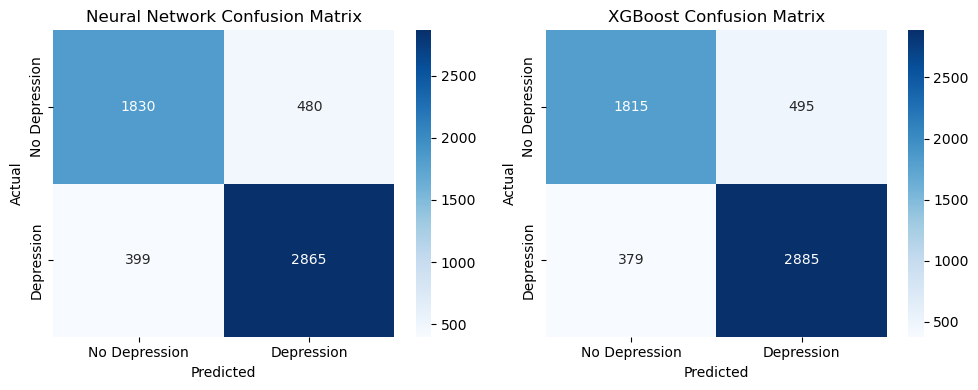

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

plt.figure(figsize=(10, 4))

# Metrics for Neural Network
NNmodel.eval()
with torch.no_grad():
    y_NN_prob = NNmodel(X_test_norm).squeeze().numpy()
    y_NN_pred = (y_NN_prob > 0.5).astype(int)

print("Neural Network Metrics:")
print(f"Accuracy: {accuracy_score(y_test_np, y_NN_pred):.4f}")
print(f"Precision: {precision_score(y_test_np, y_NN_pred):.4f}")
print(f"Recall: {recall_score(y_test_np, y_NN_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_np, y_NN_pred):.4f}")

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test_np, y_NN_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')

# Metrics for XGB
print("\nXGBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test_np, y_XGB_pred):.4f}")
print(f"Precision: {precision_score(y_test_np, y_XGB_pred):.4f}")
print(f"Recall: {recall_score(y_test_np, y_XGB_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_np, y_XGB_pred):.4f}")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test_np, y_XGB_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')

plt.tight_layout()
plt.show()